In [2]:
#dependencies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [4]:
#import data from combined csv
df = pd.read_csv('data/cleaned_data.csv')
#df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df.head(1)

,Unnamed: 0,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,video_error_or_removed,Country Code
0,0,2kyS6SvSYSE,17.14.11,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,US


In [8]:
#find outliers for number of views
views_q1 = np.percentile(df["comment_count"], 25) #find lower and upper quartiles 
views_q3 = np.percentile(df['comment_count'], 75)
views_qrange = (views_q3 - views_q1) #find interquartile range
views_lower =  views_q1 - (1.5 * views_qrange) #lower boundry
views_upper = views_q3 + (1.5 * views_qrange) #upper boundry
df['outliers'] = (df['comment_count'] < views_lower) | (df['comment_count'] > views_upper) #find outliers
df = df[df['outliers'] == False]
df.head(1)

,Unnamed: 0,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,video_error_or_removed,Country Code,outliers
3,3,puqaWrEC7tY,17.14.11,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,US,False


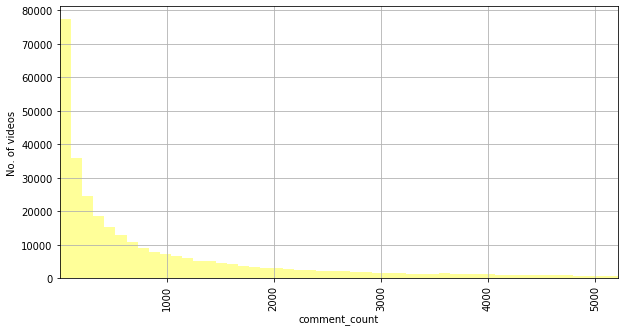

In [9]:
figure, ax = plt.subplots(figsize=(10,5))
figure = sns.distplot(df["comment_count"], color="yellow",kde=False,ax=ax)
figure = ax.set(xlabel="comment_count", ylabel="No. of videos")
figure = plt.xticks(rotation=90)
plt.grid(axis='both')
plt.xlim(df["comment_count"].min(),df["comment_count"].max())
plt.show(figure)

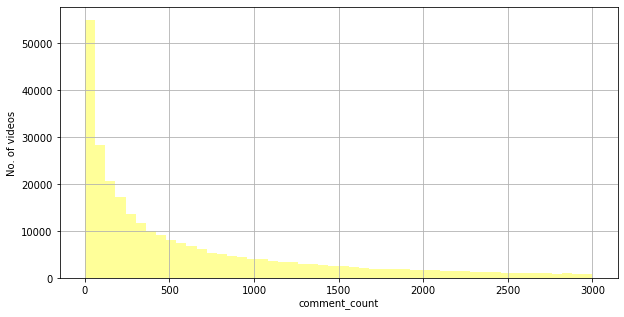

percentage of videos with likes less than 3000:


92.26141752744755

In [10]:
figure, ax = plt.subplots(figsize=(10,5))
figure = sns.distplot(df[df["comment_count"] < 3000]["comment_count"], color="yellow",kde=False,
                      ax=ax)
figure = ax.set(xlabel="comment_count", ylabel="No. of videos")
plt.grid(axis='both')
plt.show(figure)
print("percentage of videos with likes less than 3000:")
df[df['comment_count'] < 3000]['comment_count'].count() / df['comment_count'].count() * 100

1626501